### joint-RPCA

In [ ]:
biom convert \
 -i jrpca_mtb_feattab.txt \
 -o jrpca_mtb_feattab.biom \
 --table-type="OTU table" \
 --to-hdf5

qiime tools import \
 --input-path jrpca_mtb_feattab.biom \
 --output-path jrpca_mtb_feattab.qza \
 --type FeatureTable[Frequency]

biom convert \
 -i jrpca_mtx_feattab.txt \
 -o jrpca_mtx_feattab.biom \
 --table-type="OTU table" \
 --to-hdf5

qiime tools import \
 --input-path jrpca_mtx_feattab.biom \
 --output-path jrpca_mtx_feattab.qza \
 --type FeatureTable[Frequency]


In [ ]:
qiime gemelli joint-rpca \
    --i-tables jrpca/jrpca_mtb_feattab.qza jrpca/jrpca_mtx_feattab.qza \
    --m-sample-metadata-file /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca/jrpca_metadata.txt \
    --p-train-test-column  'traintest' \
    --p-max-iterations 25 \
    --p-min-feature-frequency 5 \
    --o-biplot /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca/joint_biplot.qza\
    --o-distance-matrix /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca/joint_distance_matrix.qza\
    --o-cross-validation-error /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca/cross_validation_error.qza


In [ ]:
qiime longitudinal volatility \
    --m-metadata-file /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca/cross_validation_error.qza \
    --p-state-column 'iteration' \
    --o-visualization /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca/volatility_plot.qzv

In [ ]:
qiime emperor biplot \
    --i-biplot /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca/joint_biplot.qza \
    --m-sample-metadata-file /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca/jrpca_metadata.txt \
    --p-number-of-features 25 \
    --o-visualization /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca/emperor-biplot.qzv

In [ ]:
qiime diversity beta-group-significance \
    --i-distance-matrix /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca/joint_distance_matrix.qza\
    --m-metadata-file /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca/jrpca_metadata.txt\
    --m-metadata-column 'condition'\
    --p-pairwise \
    --o-visualization /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca/permanova-cond.qzv

qiime diversity beta-group-significance \
    --i-distance-matrix /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca/joint_distance_matrix.qza\
    --m-metadata-file /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca/jrpca_metadata.txt\
    --m-metadata-column 'schedule'\
    --o-visualization /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca/permanova-sch.qzv

qiime diversity beta-group-significance \
    --i-distance-matrix /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca/joint_distance_matrix.qza\
    --m-metadata-file /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca/jrpca_metadata.txt\
    --m-metadata-column 'diet'\
    --o-visualization /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca/permanova-diet.qzv

qiime diversity beta-group-significance \
    --i-distance-matrix /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca/joint_distance_matrix.qza\
    --m-metadata-file /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca/jrpca_metadata.txt\
    --m-metadata-column 'phase'\
    --o-visualization /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca/permanova-phase.qzv

In [ ]:
!qiime gemelli filter-ordination \
    --i-ordination /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca/joint_biplot.qza \
    --i-table /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca/jrpca_mtb_feattab.qza \
    --o-subset-biplot /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca/ordination-mtb.qza

!qiime gemelli filter-ordination \
    --i-ordination /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca/joint_biplot.qza \
    --i-table /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca/jrpca_mtx_feattab.qza \
    --o-subset-biplot /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca/ordination-mtx.qza

In [ ]:
!qiime qurro loading-plot \
    --i-ranks /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca/ordination-mtb.qza \
    --i-table /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca/jrpca_mtb_feattab.qza \
    --m-sample-metadata-file /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca/jrpca_metadata.txt \
    --m-feature-metadata-file /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca/jrpca_mtb_annotation_key.txt \
    --o-visualization /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca/Qurro-mtb.qzv

!qiime qurro loading-plot \
    --i-ranks /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca/ordination-mtx.qza \
    --i-table /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca/jrpca_mtx_feattab.qza \
    --m-sample-metadata-file /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca/jrpca_metadata.txt \
    --m-feature-metadata-file /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca/jrpca_mtx_annotation_key.txt \
    --o-visualization /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca/Qurro-mtx.qzv

In [ ]:
qiime gemelli feature-correlation-table \
    --i-ordination /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca/joint_biplot.qza \
    --o-correlation-table /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca/correlation_table.qza

qiime gemelli feature-correlation-table \
    --i-ordination /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca/ordination-mtb.qza \
    --o-correlation-table /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca/correlation_mtb_table.qza

qiime gemelli feature-correlation-table \
    --i-ordination /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca/ordination-mtx.qza \
    --o-correlation-table /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca/correlation_mtx_table.qza

In [ ]:
qiime tools export --input-path /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca/correlation_table.qza \
--output-path /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca/correlation_table

qiime tools export --input-path /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca/correlation_mtb_table.qza \
--output-path /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca/correlation_mtb_table

qiime tools export --input-path /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca/correlation_mtx_table.qza \
--output-path /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca/correlation_mtx_table

In [10]:
# import data utils
import pandas as pd
import qiime2 as q2
# plotting
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline

# export the correlations (Note: this step can take a few minutes)
correlation_table = pd.read_table('/mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca/correlation_table/Correlation.tsv', sep='\t', index_col=0)
#correlation_table = q2.Artifact.load('/mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca/correlation_table.qza')
#correlation_table_df = correlation_table.view(pd.DataFrame)

/opt/anaconda3/envs/mmvec-qiime2-2020.11/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3263: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [11]:
correlation_table.shape

(7023, 7023)

In [12]:
correlation_table.head()

,1410,34393,27447,34419,32635,36594,1527,21184,35628,36602,...,PF13108.9,PF10269.12,PF00788.26,PF02892.18,PF10488.12,PF01779.20,PF20167.1,PF20338.1,PF20394.1,PF14485.9
featureid,,,,,,,,,,,,,,,,,,,,,
1410,1.000000,-0.979619,0.999801,-0.999975,0.999992,0.999996,0.999999,-0.999877,0.999988,0.999999,...,1.000000,1.000000,1.000000,0.999999,0.999999,0.999999,1.000000,0.999999,0.999999,1.000000
34393,-0.979619,1.000000,-0.975650,0.980980,-0.978793,-0.980173,-0.979396,0.982419,-0.978923,-0.979493,...,-0.979489,-0.979466,-0.979440,-0.979403,-0.979332,-0.979319,-0.979448,-0.979360,-0.979352,-0.979537
27447,0.999801,-0.975650,1.000000,-0.999658,0.999874,0.999738,0.999818,-0.999367,0.999877,0.999807,...,0.999817,0.999817,0.999820,0.999820,0.999830,0.999831,0.999820,0.999826,0.999827,0.999813
34419,-0.999975,0.980980,-0.999658,1.000000,-0.999939,-0.999988,-0.999965,0.999942,-0.999945,-0.999969,...,-0.999971,-0.999970,-0.999969,-0.999966,-0.999965,-0.999964,-0.999969,-0.999965,-0.999965,-0.999973
32635,0.999992,-0.978793,0.999874,-0.999939,1.000000,0.999975,0.999995,-0.999806,0.999996,0.999993,...,0.999994,0.999994,0.999995,0.999995,0.999996,0.999997,0.999995,0.999996,0.999996,0.999993


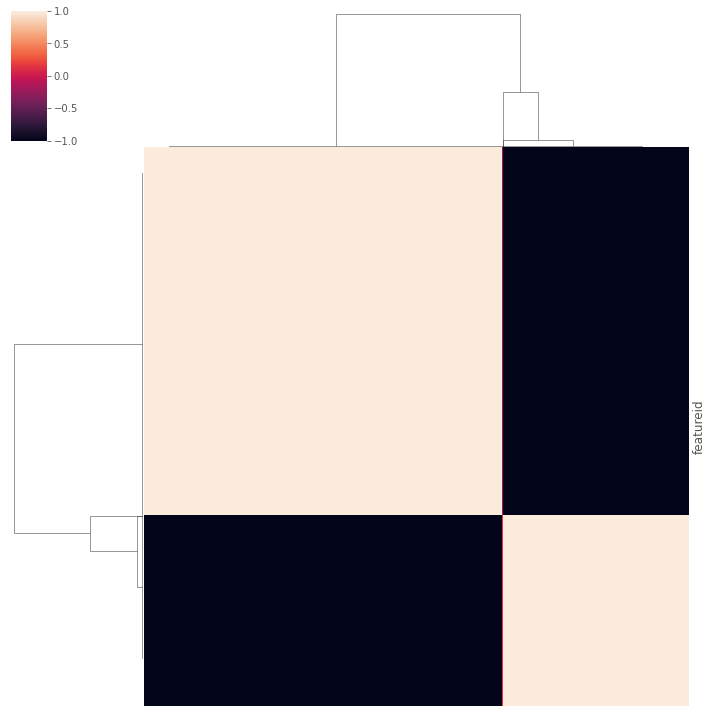

In [13]:
# plot the correlations (Note: this step can take a few minutes)
sns.clustermap(correlation_table,yticklabels=False,
               xticklabels=False)

#plt.show()
plt.savefig('/mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca/correlation_table/Correlation_heatmap_all.png',
            dpi=300,bbox_inches='tight')

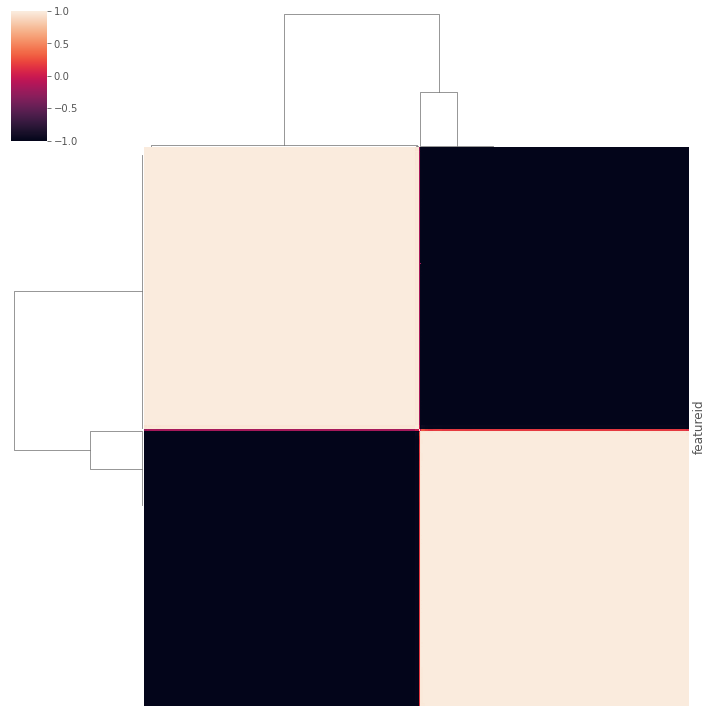

In [7]:
# import data utils
import pandas as pd
import qiime2 as q2
# plotting
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline

# export the correlations (Note: this step can take a few minutes)
correlation_table = pd.read_table('/mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca/correlation_mtb_table/Correlation.tsv', sep='\t', index_col=0)

# plot the correlations (Note: this step can take a few minutes)
sns.clustermap(correlation_table,yticklabels=False,
               xticklabels=False)

#plt.show()
plt.savefig('/mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca/correlation_mtb_table/Correlation_heatmap_mtb.png',
            dpi=300,bbox_inches='tight')

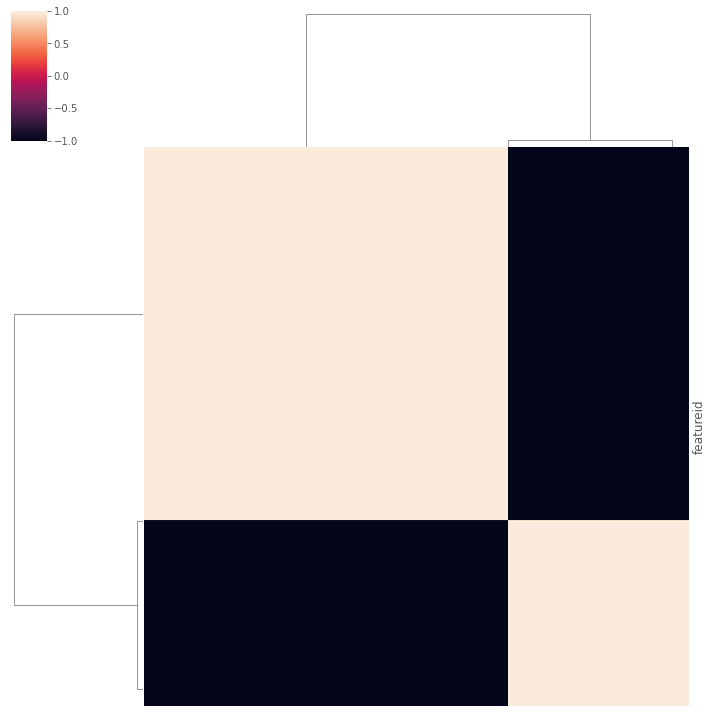

In [8]:
# import data utils
import pandas as pd
import qiime2 as q2
# plotting
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline

# export the correlations (Note: this step can take a few minutes)
correlation_table = pd.read_table('/mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca/correlation_mtx_table/Correlation.tsv', sep='\t', index_col=0)

# plot the correlations (Note: this step can take a few minutes)
sns.clustermap(correlation_table,yticklabels=False,
               xticklabels=False)

#plt.show()
plt.savefig('/mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca/correlation_mtb_table/Correlation_heatmap_mtx.png',
            dpi=300,bbox_inches='tight')

In [ ]:
biom convert \
 -i jrpca_mtbcarbSCFA_feattab.txt \
 -o jrpca_mtbcarbSCFA_feattab.biom \
 --table-type="OTU table" \
 --to-hdf5

qiime tools import \
 --input-path jrpca_mtbcarbSCFA_feattab.biom \
 --output-path jrpca_mtbcarbSCFA_feattab.qza \
 --type FeatureTable[Frequency]

biom convert \
 -i jrpca_mtx5per_feattab.txt \
 -o jrpca_mtx5per_feattab.biom \
 --table-type="OTU table" \
 --to-hdf5

qiime tools import \
 --input-path jrpca_mtx5per_feattab.biom \
 --output-path jrpca_mtx5per_feattab.qza \
 --type FeatureTable[Frequency]

In [ ]:
qiime gemelli joint-rpca \
    --i-tables jrpca/jrpca_mtbcarbSCFA_feattab.qza jrpca/jrpca_mtx5per_feattab.qza \
    --m-sample-metadata-file /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca/jrpca_metadata.txt \
    --p-train-test-column  'traintest' \
    --p-max-iterations 25 \
    --p-min-feature-frequency 5 \
    --o-biplot /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca/joint_qurro_biplot.qza\
    --o-distance-matrix /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca/joint_qurro_distance_matrix.qza\
    --o-cross-validation-error /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca/cross_qrro_validation_error.qza

In [ ]:
qiime gemelli feature-correlation-table \
    --i-ordination /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca/joint_qurro_biplot.qza \
    --o-correlation-table /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca/correlation_qurro_table.qza

qiime tools export --input-path /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca/correlation_qurro_table.qza \
--output-path /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca/correlation_qurro_table

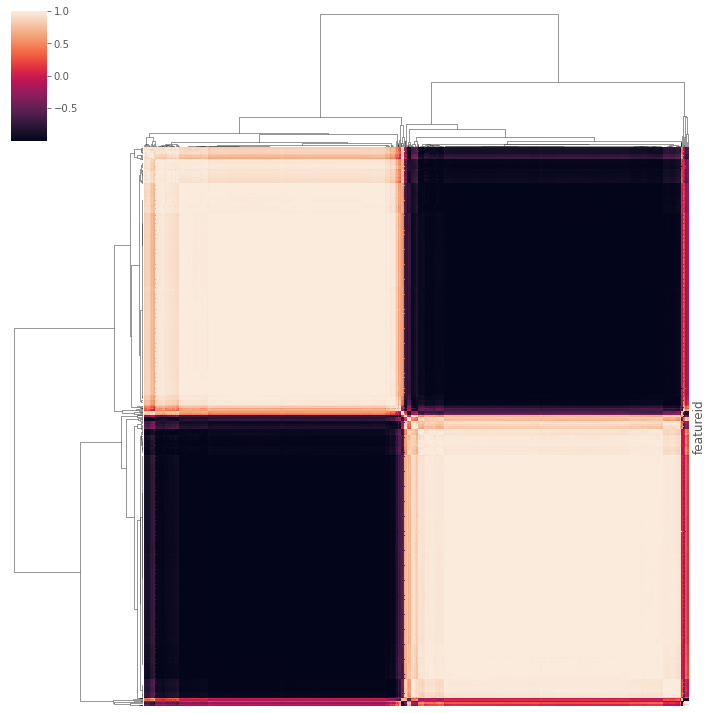

In [9]:
# import data utils
import pandas as pd
import qiime2 as q2
# plotting
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline

# export the correlations (Note: this step can take a few minutes)
correlation_table = pd.read_table('/mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca/correlation_qurro_table/Correlation.tsv', sep='\t', index_col=0)

# plot the correlations (Note: this step can take a few minutes)
sns.clustermap(correlation_table,yticklabels=False,
               xticklabels=False)

#plt.show()
plt.savefig('/mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca/correlation_qurro_table/Correlation_heatmap_qurro.png',
            dpi=300,bbox_inches='tight')

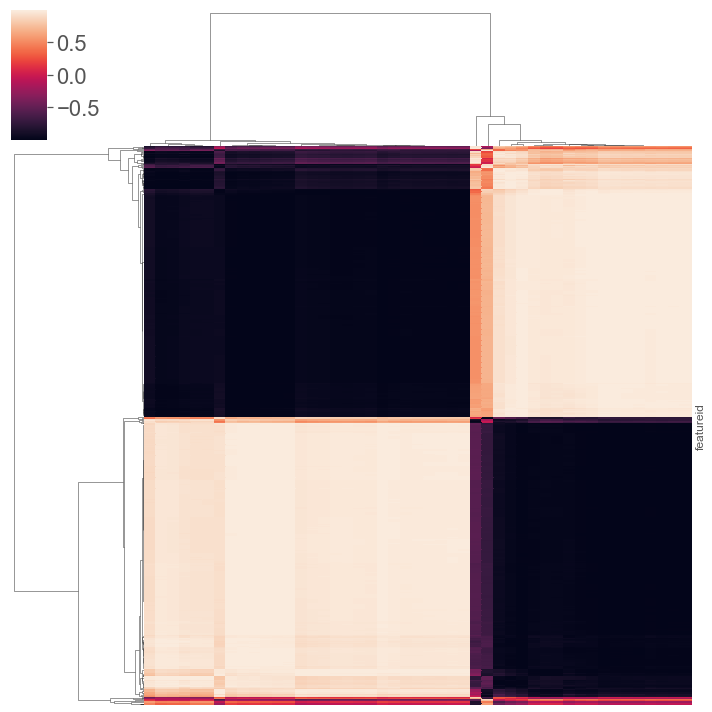

In [20]:
# import data utils
import pandas as pd
import qiime2 as q2
# plotting
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline

# export the correlations (Note: this step can take a few minutes)
correlation_table = pd.read_table('/mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca/correlation_qurro_table/Correlation_sub.tsv', sep='\t', index_col=0)

# plot the correlations (Note: this step can take a few minutes)
sns.clustermap(correlation_table,yticklabels=False,
               xticklabels=False)

#plt.show()
plt.savefig('/mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca/correlation_qurro_table/Correlation_heatmap_qurro_sub.png',
            dpi=300,bbox_inches='tight')

In [ ]:
biom convert \
 -i jrpca_mtxcarb_fattyacid_feattab.txt \
 -o jrpca_mtxcarb_fattyacid_feattab.biom \
 --table-type="OTU table" \
 --to-hdf5

qiime tools import \
 --input-path jrpca_mtxcarb_fattyacid_feattab.biom \
 --output-path jrpca_mtxcarb_fattyacid_feattab.qza \
 --type FeatureTable[Frequency]

qiime gemelli joint-rpca \
    --i-tables jrpca/jrpca_mtbcarbSCFA_feattab.qza jrpca/jrpca_mtxcarb_fattyacid_feattab.qza \
    --m-sample-metadata-file /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca/jrpca_metadata.txt \
    --p-train-test-column  'traintest' \
    --p-max-iterations 25 \
    --p-min-feature-frequency 5 \
    --o-biplot /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca/joint_qurro2_biplot.qza\
    --o-distance-matrix /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca/joint_qurro2_distance_matrix.qza\
    --o-cross-validation-error /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca/cross_qrro2_validation_error.qza

qiime gemelli feature-correlation-table \
    --i-ordination /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca/joint_qurro2_biplot.qza \
    --o-correlation-table /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca/correlation_qurro2_table.qza

qiime tools export --input-path /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca/correlation_qurro2_table.qza \
--output-path /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca/correlation_qurro2_table

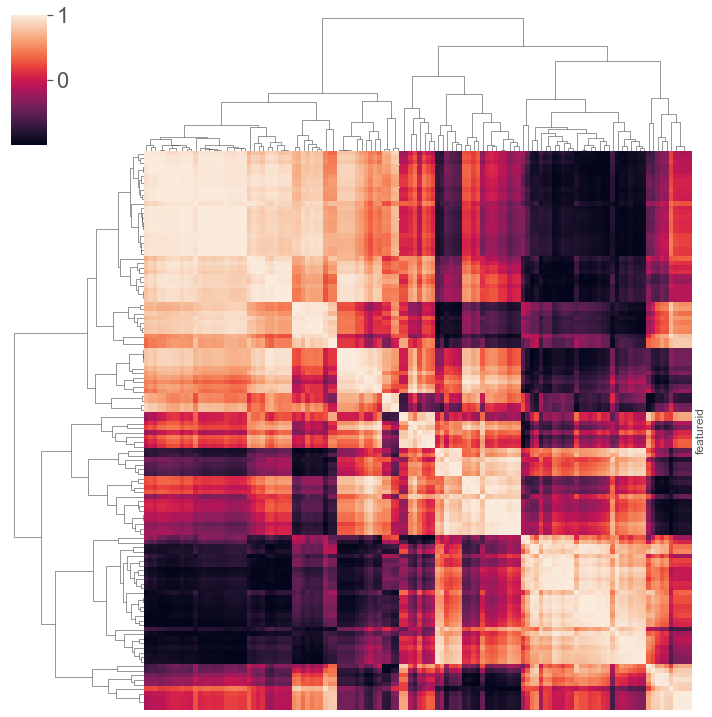

In [21]:
# import data utils
import pandas as pd
import qiime2 as q2
# plotting
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline

# export the correlations (Note: this step can take a few minutes)
correlation_table = pd.read_table('/mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca/correlation_qurro2_table/Correlation.tsv', sep='\t', index_col=0)

# plot the correlations (Note: this step can take a few minutes)
sns.clustermap(correlation_table,yticklabels=False,
               xticklabels=False)

#plt.show()
plt.savefig('/mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca/correlation_qurro2_table/Correlation_heatmap_qurro2.png',
            dpi=300,bbox_inches='tight')

<Figure size 21600x21600 with 0 Axes>

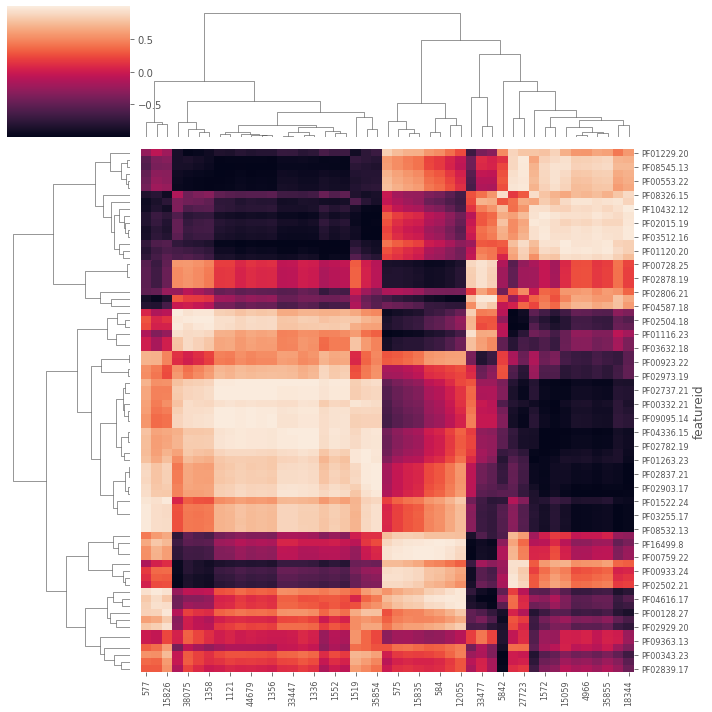

In [9]:
# import data utils
import pandas as pd
import qiime2 as q2
# plotting
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline

# export the correlations (Note: this step can take a few minutes)
correlation_table = pd.read_table('/mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca/correlation_qurro2_table/Correlation_sub.tsv', sep='\t', index_col=0)
plt.figure(figsize=(300, 300))
# plot the correlations (Note: this step can take a few minutes)
heatmap = sns.clustermap(correlation_table)

# Adjust the labels to fit within the heatmap
plt.setp(heatmap.ax_heatmap.yaxis.get_majorticklabels(), rotation=0, ha='left', fontsize=8)
plt.setp(heatmap.ax_heatmap.xaxis.get_majorticklabels(), rotation=90, ha='center', fontsize=8)

plt.tight_layout()

plt.show()
#plt.savefig('/mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca/correlation_qurro2_table/Correlation_heatmap_qurro2_sub.png',
            #dpi=300,bbox_inches='tight')

In [ ]:
biom convert \
 -i jrpca_mtxFAFTD73aldex_feattab.txt \
 -o jrpca_mtxFAFTD73aldex_feattab.biom \
 --table-type="OTU table" \
 --to-hdf5

qiime tools import \
 --input-path jrpca_mtxFAFTD73aldex_feattab.biom \
 --output-path jrpca_mtxFAFTD73aldex_feattab.qza \
 --type FeatureTable[Frequency]

qiime gemelli joint-rpca \
    --i-tables jrpca/jrpca_mtbcarbSCFA_feattab.qza jrpca/jrpca_mtxFAFTD73aldex_feattab.qza \
    --m-sample-metadata-file /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca/jrpca_metadata.txt \
    --p-train-test-column  'traintest' \
    --p-max-iterations 25 \
    --p-min-feature-frequency 5 \
    --o-biplot /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca/joint_qurro3_biplot.qza\
    --o-distance-matrix /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca/joint_qurro3_distance_matrix.qza\
    --o-cross-validation-error /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca/cross_qrro3_validation_error.qza

qiime gemelli feature-correlation-table \
    --i-ordination /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca/joint_qurro3_biplot.qza \
    --o-correlation-table /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca/correlation_qurro3_table.qza

qiime tools export --input-path /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca/correlation_qurro3_table.qza \
--output-path /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca/correlation_qurro3_table

<Figure size 21600x21600 with 0 Axes>

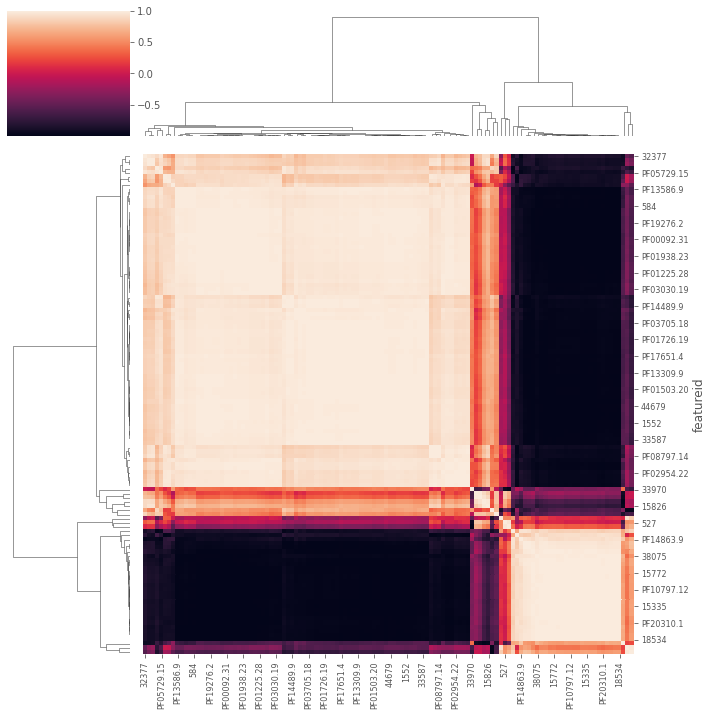

In [14]:
# import data utils
import pandas as pd
import qiime2 as q2
# plotting
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline

# export the correlations (Note: this step can take a few minutes)
correlation_table = pd.read_table('/mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca/correlation_qurro3_table/Correlation.tsv', sep='\t', index_col=0)
plt.figure(figsize=(300, 300))
# plot the correlations (Note: this step can take a few minutes)
heatmap = sns.clustermap(correlation_table)

# Adjust the labels to fit within the heatmap
plt.setp(heatmap.ax_heatmap.yaxis.get_majorticklabels(), rotation=0, ha='left', fontsize=8)
plt.setp(heatmap.ax_heatmap.xaxis.get_majorticklabels(), rotation=90, ha='center', fontsize=8)

plt.tight_layout()

plt.show()
#plt.savefig('/mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca/correlation_qurro2_table/Correlation_heatmap_qurro2_sub.png',
            #dpi=300,bbox_inches='tight')

<Figure size 21600x21600 with 0 Axes>

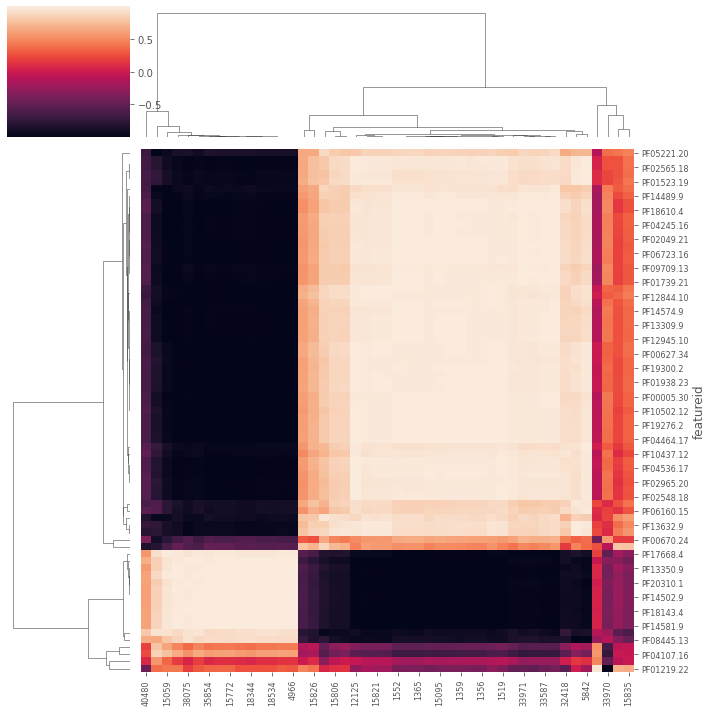

In [15]:
# import data utils
import pandas as pd
import qiime2 as q2
# plotting
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline

# export the correlations (Note: this step can take a few minutes)
correlation_table = pd.read_table('/mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca/correlation_qurro3_table/Correlation_sub.tsv', sep='\t', index_col=0)
plt.figure(figsize=(300, 300))
# plot the correlations (Note: this step can take a few minutes)
heatmap = sns.clustermap(correlation_table)

# Adjust the labels to fit within the heatmap
plt.setp(heatmap.ax_heatmap.yaxis.get_majorticklabels(), rotation=0, ha='left', fontsize=8)
plt.setp(heatmap.ax_heatmap.xaxis.get_majorticklabels(), rotation=90, ha='center', fontsize=8)

plt.tight_layout()

plt.show()
#plt.savefig('/mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca/correlation_qurro2_table/Correlation_heatmap_qurro2_sub.png',
            #dpi=300,bbox_inches='tight')

In [ ]:
biom convert \
 -i jrpca_mtxFANA_450aldex_feattab.txt \
 -o jrpca_mtxFANA_450aldex_feattab.biom \
 --table-type="OTU table" \
 --to-hdf5

qiime tools import \
 --input-path jrpca_mtxFANA_450aldex_feattab.biom \
 --output-path jrpca_mtxFANA_450aldex_feattab.qza \
 --type FeatureTable[Frequency]

qiime gemelli joint-rpca \
    --i-tables jrpca/jrpca_mtbcarbSCFA_feattab.qza jrpca/jrpca_mtxFANA_450aldex_feattab.qza \
    --m-sample-metadata-file /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca/jrpca_metadata.txt \
    --p-train-test-column  'traintest' \
    --p-max-iterations 25 \
    --p-min-feature-frequency 5 \
    --o-biplot /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca/joint_qurro4_biplot.qza\
    --o-distance-matrix /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca/joint_qurro4_distance_matrix.qza\
    --o-cross-validation-error /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca/cross_qrro4_validation_error.qza

qiime gemelli feature-correlation-table \
    --i-ordination /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca/joint_qurro4_biplot.qza \
    --o-correlation-table /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca/correlation_qurro4_table.qza

qiime tools export --input-path /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca/correlation_qurro4_table.qza \
--output-path /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca/correlation_qurro4_table

<Figure size 21600x21600 with 0 Axes>

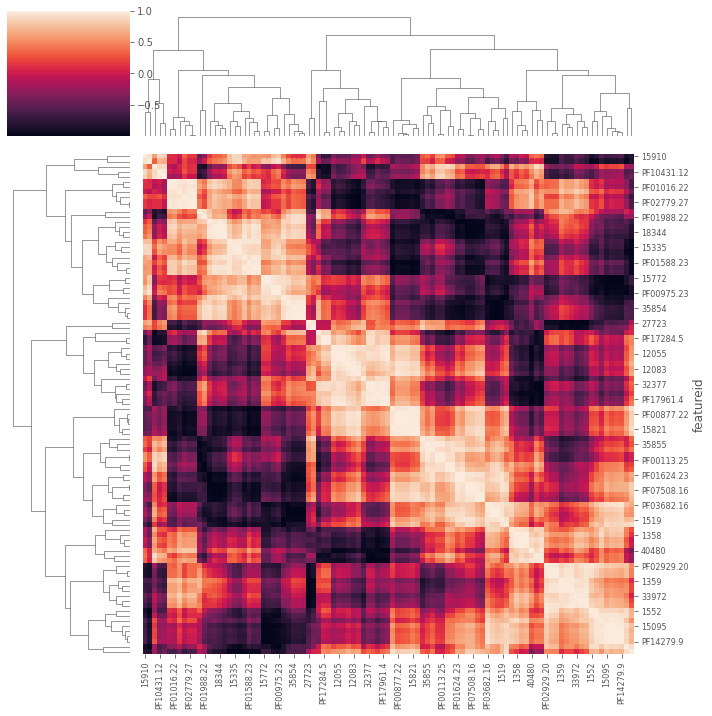

In [1]:
# import data utils
import pandas as pd
import qiime2 as q2
# plotting
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline

# export the correlations (Note: this step can take a few minutes)
correlation_table = pd.read_table('/mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca/correlation_qurro4_table/Correlation.tsv', sep='\t', index_col=0)
plt.figure(figsize=(300, 300))
# plot the correlations (Note: this step can take a few minutes)
heatmap = sns.clustermap(correlation_table)

# Adjust the labels to fit within the heatmap
plt.setp(heatmap.ax_heatmap.yaxis.get_majorticklabels(), rotation=0, ha='left', fontsize=8)
plt.setp(heatmap.ax_heatmap.xaxis.get_majorticklabels(), rotation=90, ha='center', fontsize=8)

plt.tight_layout()

plt.show()
#plt.savefig('/mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca/correlation_qurro2_table/Correlation_heatmap_qurro2_sub.png',
            #dpi=300,bbox_inches='tight')